## analyse descriptive et Clustring

In [1]:
import seaborn as sns


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3


In [3]:
player = pd.read_csv('/home/rajarabii/projects/Football Européen avec le machine learning/ML/player.csv')
player_attribute =pd.read_csv('/home/rajarabii/projects/Football Européen avec le machine learning/ML/player_attribute.csv')

In [4]:
player_attribute

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,role,performance_score
0,505942,Aaron Appindangoye,1,218353,2016-02-18,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,Defender,47.275
1,505942,Aaron Appindangoye,2,218353,2015-11-19,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,47.275
2,505942,Aaron Appindangoye,3,218353,2015-09-21,62.0,66.0,right,medium,medium,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,42.875
3,505942,Aaron Appindangoye,4,218353,2015-03-20,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,Defender,41.725
4,505942,Aaron Appindangoye,5,218353,2007-02-22,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,Defender,41.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283294,39902,Zvjezdan Misimovic,183974,102359,2009-08-30,83.0,85.0,right,medium,low,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009,Defender,45.275
283295,39902,Zvjezdan Misimovic,183975,102359,2009-02-22,78.0,80.0,right,medium,low,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009,Defender,42.975
283296,39902,Zvjezdan Misimovic,183976,102359,2008-08-30,77.0,80.0,right,medium,low,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008,Defender,42.575
283297,39902,Zvjezdan Misimovic,183977,102359,2007-08-30,78.0,81.0,right,medium,low,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007,Defender,42.675


In [5]:
null_counts = player_attribute.isnull().sum()

columns_with_nulls = null_counts[null_counts == 1211].index
player_attribute = player_attribute.dropna(subset=columns_with_nulls, how='all')


In [6]:
player_attribute

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,role,performance_score
0,505942,Aaron Appindangoye,1,218353,2016-02-18,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,Defender,47.275
1,505942,Aaron Appindangoye,2,218353,2015-11-19,67.0,71.0,right,medium,medium,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,47.275
2,505942,Aaron Appindangoye,3,218353,2015-09-21,62.0,66.0,right,medium,medium,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,42.875
3,505942,Aaron Appindangoye,4,218353,2015-03-20,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,Defender,41.725
4,505942,Aaron Appindangoye,5,218353,2007-02-22,61.0,65.0,right,medium,medium,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,Defender,41.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283294,39902,Zvjezdan Misimovic,183974,102359,2009-08-30,83.0,85.0,right,medium,low,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009,Defender,45.275
283295,39902,Zvjezdan Misimovic,183975,102359,2009-02-22,78.0,80.0,right,medium,low,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009,Defender,42.975
283296,39902,Zvjezdan Misimovic,183976,102359,2008-08-30,77.0,80.0,right,medium,low,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008,Defender,42.575
283297,39902,Zvjezdan Misimovic,183977,102359,2007-08-30,78.0,81.0,right,medium,low,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007,Defender,42.675


In [7]:
# Liste des colonnes spécifiques
columns_to_replace = ['sliding_tackle', 'vision', 'jumping', 'balance', 'agility', 'curve', 'volleys']

# Remplacer les valeurs nulles par la médiane pour chaque colonne
player_attribute[columns_to_replace] = player_attribute[columns_to_replace].apply(lambda col: col.fillna(col.median()))

# Afficher les résultats pour vérifier
print(player_attribute[columns_to_replace].isnull().sum())  # Vérifier s'il y a encore des valeurs nulles


sliding_tackle    0
vision            0
jumping           0
balance           0
agility           0
curve             0
volleys           0
dtype: int64


/tmp/ipykernel_160306/934771234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_attribute[columns_to_replace] = player_attribute[columns_to_replace].apply(lambda col: col.fillna(col.median()))


In [8]:
player_attribute = player_attribute.drop(columns=['attacking_work_rate','defensive_work_rate'])

In [9]:
top_players_by_role = player_attribute.loc[player_attribute.groupby(['season', 'role'])['performance_score'].idxmax()]

top_players_by_role = top_players_by_role[
    ['season', 'date','role', 'player_name', 'performance_score', 'overall_rating', 'potential']
]

top_players_by_role

,season,date,role,player_name,performance_score,overall_rating,potential
279792,2007,2007-02-22,Attacker,Yevheniy Konoplyanka,48.666667,82.0,86.0
11121,2007,2007-08-30,Defender,Alessandro Nesta,63.925000,91.0,92.0
99388,2007,2007-02-22,Goalkeeper,Gianluigi Buffon,65.175000,93.0,93.0
236405,2007,2007-02-22,Midfielder,Ross Turnbull,48.666667,61.0,73.0
125143,2008,2008-08-30,Attacker,Jermain Defoe,48.533333,81.0,84.0
40597,2008,2008-08-30,Defender,Carles Puyol,62.650000,88.0,90.0
112658,2008,2008-08-30,Goalkeeper,Iker Casillas,64.000000,91.0,92.0
158992,2008,2008-08-30,Midfielder,Loosemy Karaboue,47.466667,56.0,77.0
5007,2009,2009-02-22,Attacker,Adrian Mutu,51.000000,85.0,85.0
40596,2009,2009-08-30,Defender,Carles Puyol,62.650000,88.0,90.0


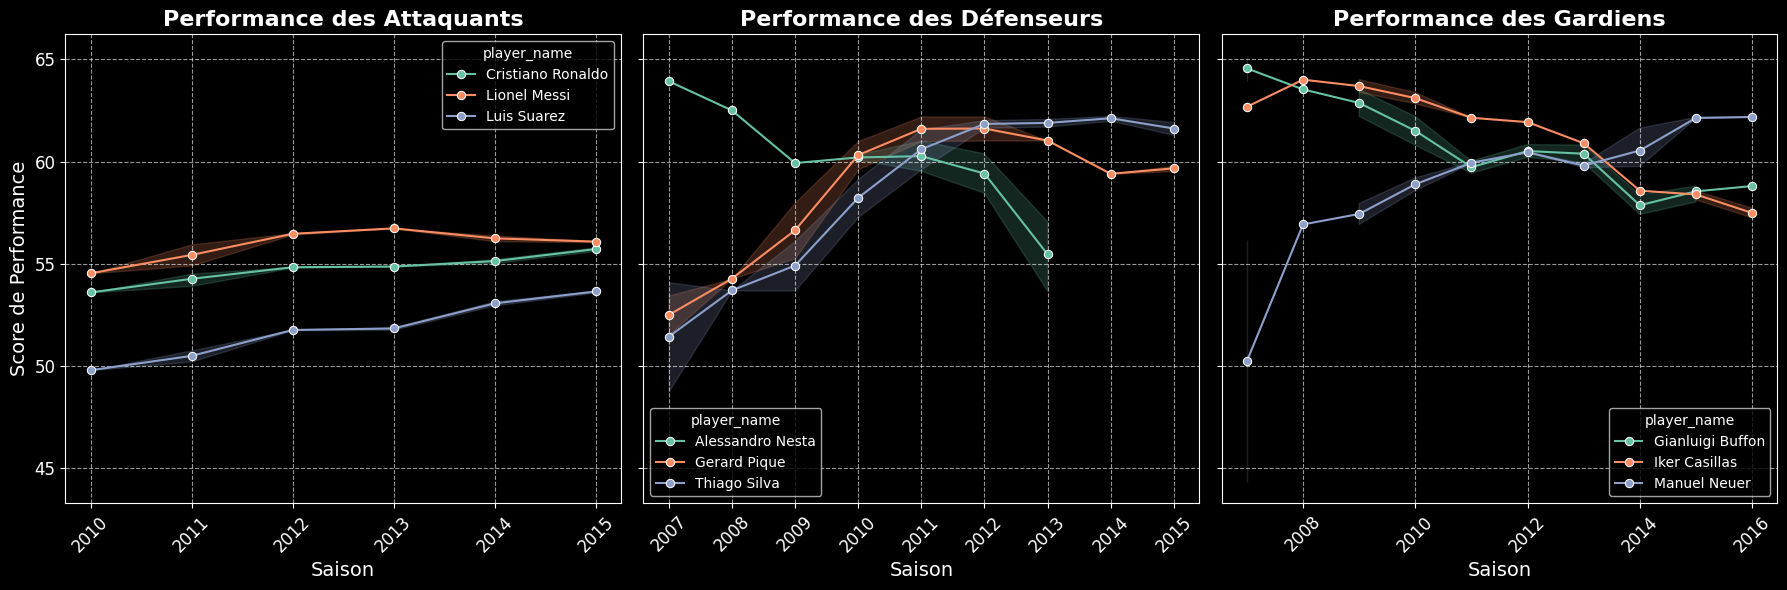

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du thème sombre
plt.style.use('dark_background')

best_attackers = ['Lionel Messi', 'Cristiano Ronaldo', 'Luis Suarez'] 
best_defenders = ['Thiago Silva', 'Gerard Pique', 'Alessandro Nesta']  
best_goalkeepers = ['Gianluigi Buffon', 'Manuel Neuer', 'Iker Casillas'] 

attackers = player_attribute[(player_attribute['role'] == 'Attacker') & 
                             (player_attribute['player_name'].isin(best_attackers))]
defenders = player_attribute[(player_attribute['role'] == 'Defender') & 
                             (player_attribute['player_name'].isin(best_defenders))]
goalkeepers = player_attribute[(player_attribute['role'] == 'Goalkeeper') & 
                               (player_attribute['player_name'].isin(best_goalkeepers))]


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  

axes = axes.flatten()

palette = sns.color_palette("Set2", n_colors=3) 

sns.lineplot(data=attackers, x='season', y='performance_score', hue='player_name', palette=palette, ax=axes[0], marker='o')
axes[0].set_title('Performance des Attaquants', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Saison', fontsize=14)
axes[0].set_ylabel('Score de Performance', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[0].tick_params(axis='y', labelsize=12, colors='white')
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.lineplot(data=defenders, x='season', y='performance_score', hue='player_name', palette=palette, ax=axes[1], marker='o')
axes[1].set_title('Performance des Défenseurs', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Saison', fontsize=14)
axes[1].set_ylabel('Score de Performance', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[1].tick_params(axis='y', labelsize=12, colors='white')
axes[1].grid(True, linestyle='--', alpha=0.6)

sns.lineplot(data=goalkeepers, x='season', y='performance_score', hue='player_name', palette=palette, ax=axes[2], marker='o')
axes[2].set_title('Performance des Gardiens', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Saison', fontsize=14)
axes[2].set_ylabel('Score de Performance', fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[2].tick_params(axis='y', labelsize=12, colors='white')
axes[2].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()

plt.show()


<Figure size 1600x600 with 0 Axes>

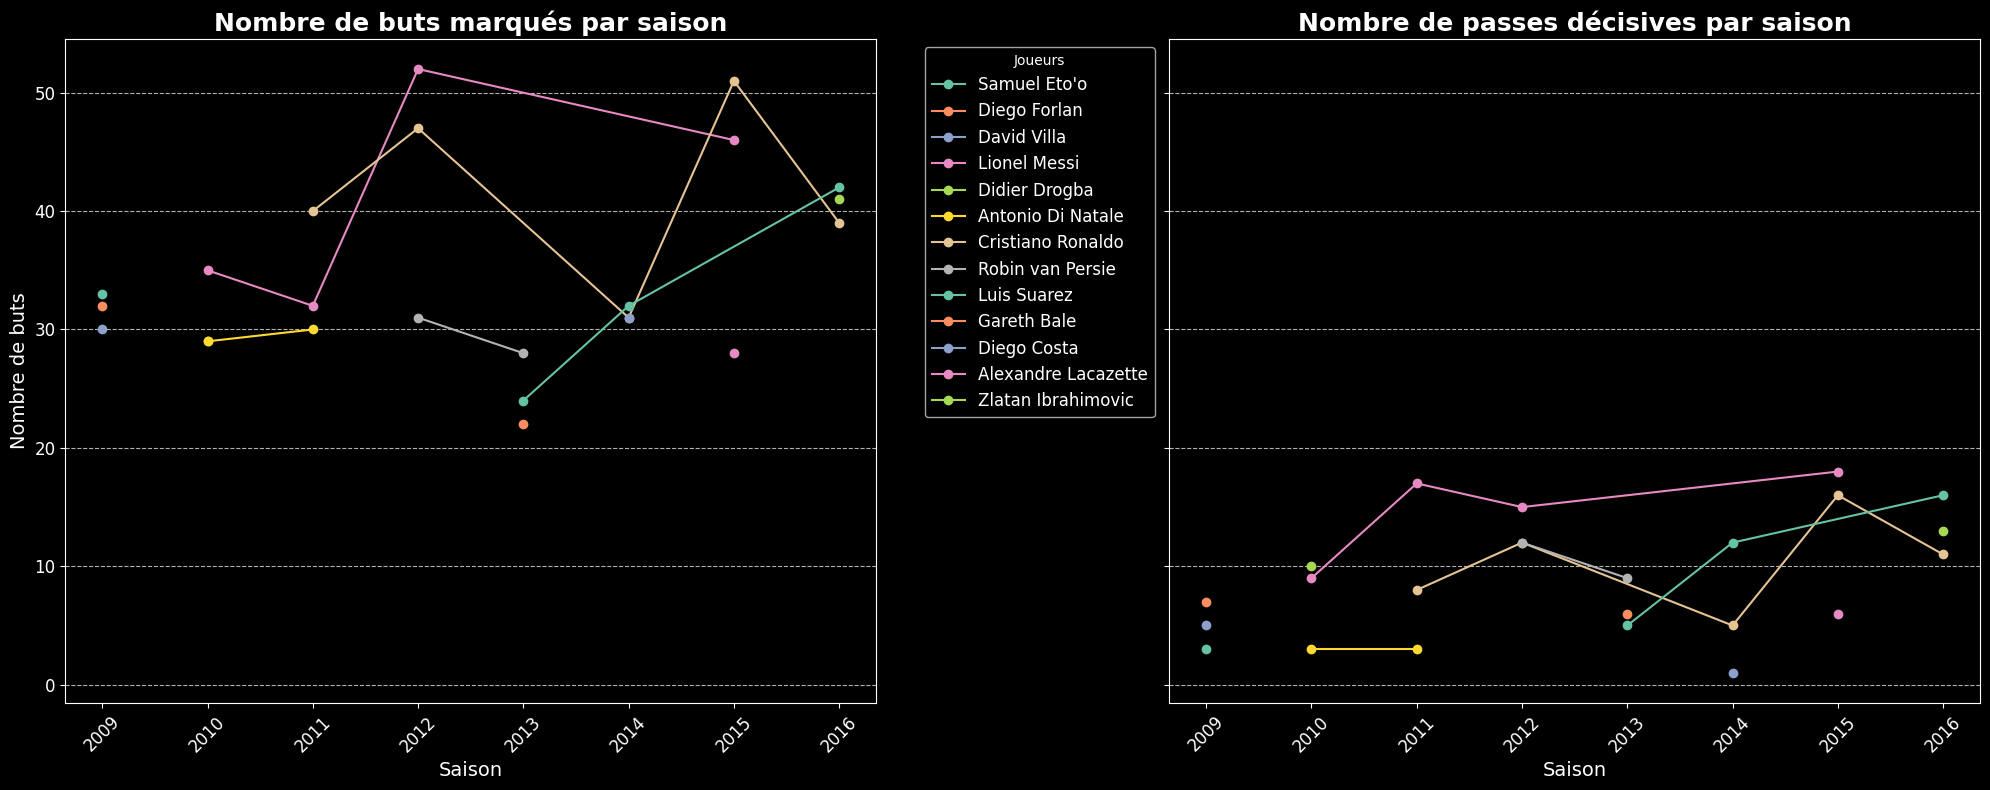

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du thème sombre
plt.style.use('dark_background')

# Groupement par joueur et saison pour calculer la somme des buts et des assists
table_player_grouped = player.groupby(['player_name', 'season']).agg({
    'assist': 'sum',
    'goals': 'sum'
}).reset_index()

# Trier les données par saison, puis par buts et assists (décroissant pour les deux)
table_player_grouped_sorted = table_player_grouped.sort_values(
    by=['season', 'goals', 'assist'], ascending=[True, False, False]
)

# Prendre les 3 meilleurs joueurs par saison
top_3_players_per_season = table_player_grouped_sorted.groupby('season').head(3).reset_index(drop=True)

# Créer une palette de couleurs distinctes
colors = sns.color_palette("Set2", n_colors=len(top_3_players_per_season['player_name'].unique()))

# Créer les sous-graphiques
plt.figure(figsize=(16, 6))
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)


# Tracer le nombre de buts par saison
for idx, player_x in enumerate(top_3_players_per_season['player_name'].unique()):
    player_data = top_3_players_per_season[top_3_players_per_season['player_name'] == player_x]
    axes[0].plot(player_data['season'], player_data['goals'], marker='o', label=player_x, color=colors[idx])

axes[0].set_title('Nombre de buts marqués par saison', fontsize=18, fontweight='bold', color='white')
axes[0].set_xlabel('Saison', fontsize=14, color='white')
axes[0].set_ylabel('Nombre de buts', fontsize=14, color='white')
axes[0].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[0].tick_params(axis='y', labelsize=12, colors='white')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Joueurs', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Tracer le nombre de passes décisives par saison
for idx, player_x in enumerate(top_3_players_per_season['player_name'].unique()):
    player_data = top_3_players_per_season[top_3_players_per_season['player_name'] == player_x]
    axes[1].plot(player_data['season'], player_data['assist'], marker='o', label=player_x, color=colors[idx])

axes[1].set_title('Nombre de passes décisives par saison', fontsize=18, fontweight='bold', color='white')
axes[1].set_xlabel('Saison', fontsize=14, color='white')
axes[1].tick_params(axis='x', rotation=45, labelsize=12, colors='white')
axes[1].tick_params(axis='y', labelsize=12, colors='white')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster les espacements et afficher le graphique
plt.tight_layout()
plt.show()


In [12]:
player_attribute

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,role,performance_score
0,505942,Aaron Appindangoye,1,218353,2016-02-18,67.0,71.0,right,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,Defender,47.275
1,505942,Aaron Appindangoye,2,218353,2015-11-19,67.0,71.0,right,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,47.275
2,505942,Aaron Appindangoye,3,218353,2015-09-21,62.0,66.0,right,49.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,Defender,42.875
3,505942,Aaron Appindangoye,4,218353,2015-03-20,61.0,65.0,right,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,Defender,41.725
4,505942,Aaron Appindangoye,5,218353,2007-02-22,61.0,65.0,right,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,Defender,41.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283294,39902,Zvjezdan Misimovic,183974,102359,2009-08-30,83.0,85.0,right,84.0,77.0,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009,Defender,45.275
283295,39902,Zvjezdan Misimovic,183975,102359,2009-02-22,78.0,80.0,right,74.0,76.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2009,Defender,42.975
283296,39902,Zvjezdan Misimovic,183976,102359,2008-08-30,77.0,80.0,right,74.0,71.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008,Defender,42.575
283297,39902,Zvjezdan Misimovic,183977,102359,2007-08-30,78.0,81.0,right,74.0,64.0,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007,Defender,42.675


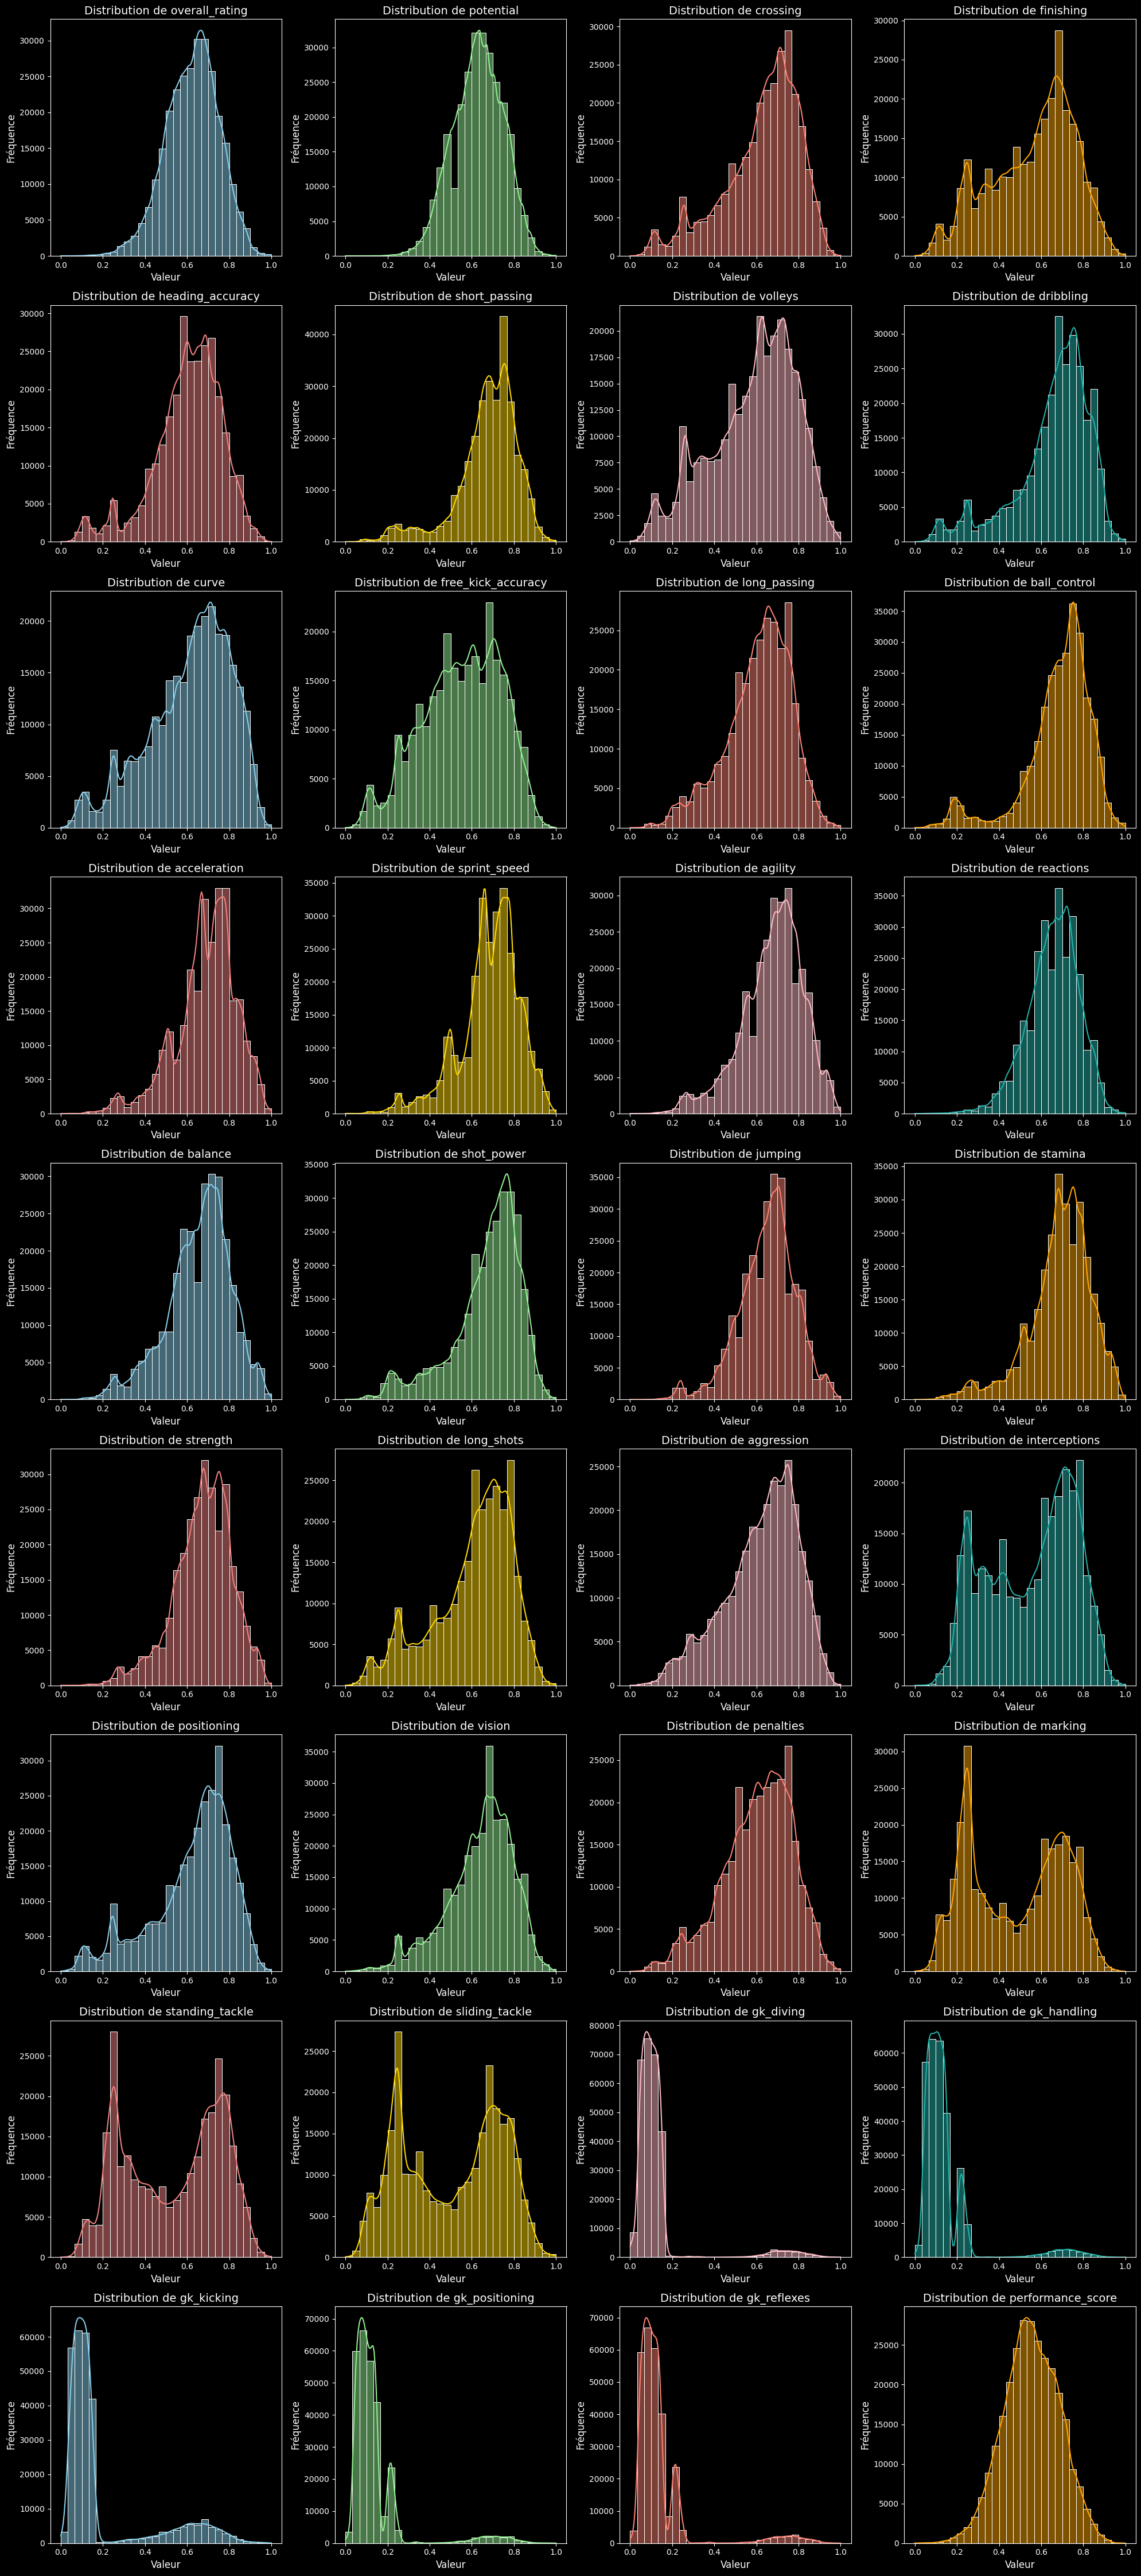

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Filtrer les colonnes numériques


# Normalisation Min-Max
scaler = MinMaxScaler()
x = player_attribute.copy() 
x = x.drop(columns=['player_api_id', 'id', 'player_fifa_api_id', 'season'])
df_normalized = x.copy() 
numerical_columns = df_normalized.select_dtypes(include=['number']).columns
df_normalized[numerical_columns] = scaler.fit_transform(x[numerical_columns])


numerical_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 3) // 4  

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Appliquer le thème sombre
plt.style.use('dark_background')

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'gold', 'lightpink', 'lightseagreen']

for idx, col in enumerate(numerical_columns):
    sns.histplot(df_normalized[col], kde=True, ax=axes[idx], bins=30, color=colors[idx % len(colors)])
    axes[idx].set_title(f'Distribution de {col}', fontsize=14, color='white')
    axes[idx].set_xlabel('Valeur', fontsize=12, color='white')
    axes[idx].set_ylabel('Fréquence', fontsize=12, color='white')
    axes[idx].tick_params(colors='white')  # Couleur des ticks

# Supprimer les axes inutilisés
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Analyse des match et des equipes

In [14]:
conn =sqlite3.connect("/home/rajarabii/projects/Football Européen avec le machine learning/database .sqlite")

cursor = conn.cursor()


In [15]:
team = pd.read_csv('/home/rajarabii/projects/Football Européen avec le machine learning/ML/statistics_teams_per_league.csv')
match_ = pd.read_sql('select * from match',conn)
team_attribute = pd.read_csv('/home/rajarabii/projects/Football Européen avec le machine learning/ML/table_team_attribute.csv')
table_name_team = pd.read_sql('select * from team',conn)
table_name_team = table_name_team[['team_api_id','team_long_name','team_short_name']]

In [16]:
x =pd.read_sql('select * from Team_Attributes',conn)
x

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [17]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_api_id        1846 non-null   int64  
 1   year               1846 non-null   int64  
 2   wins               1846 non-null   int64  
 3   team_long_name_y   1842 non-null   object 
 4   team_short_name_y  1842 non-null   object 
 5   defeats            1842 non-null   float64
 6   league_id_y        1842 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 101.1+ KB


In [18]:
team

,team_api_id,year,wins,team_long_name_y,team_short_name_y,defeats,league_id_y
0,1601,2008,6,Ruch Chorzów,CHO,7.0,15722.0
1,1601,2009,13,Ruch Chorzów,CHO,12.0,15722.0
2,1601,2010,10,Ruch Chorzów,CHO,10.0,15722.0
3,1601,2011,15,Ruch Chorzów,CHO,12.0,15722.0
4,1601,2012,11,Ruch Chorzów,CHO,9.0,15722.0
...,...,...,...,...,...,...,...
1841,208931,2015,2,Carpi,CAP,11.0,10257.0
1842,208931,2016,7,Carpi,CAP,7.0,10257.0
1843,274581,2014,6,Royal Excel Mouscron,MOP,10.0,1.0
1844,274581,2015,6,Royal Excel Mouscron,MOP,18.0,1.0


In [19]:
team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


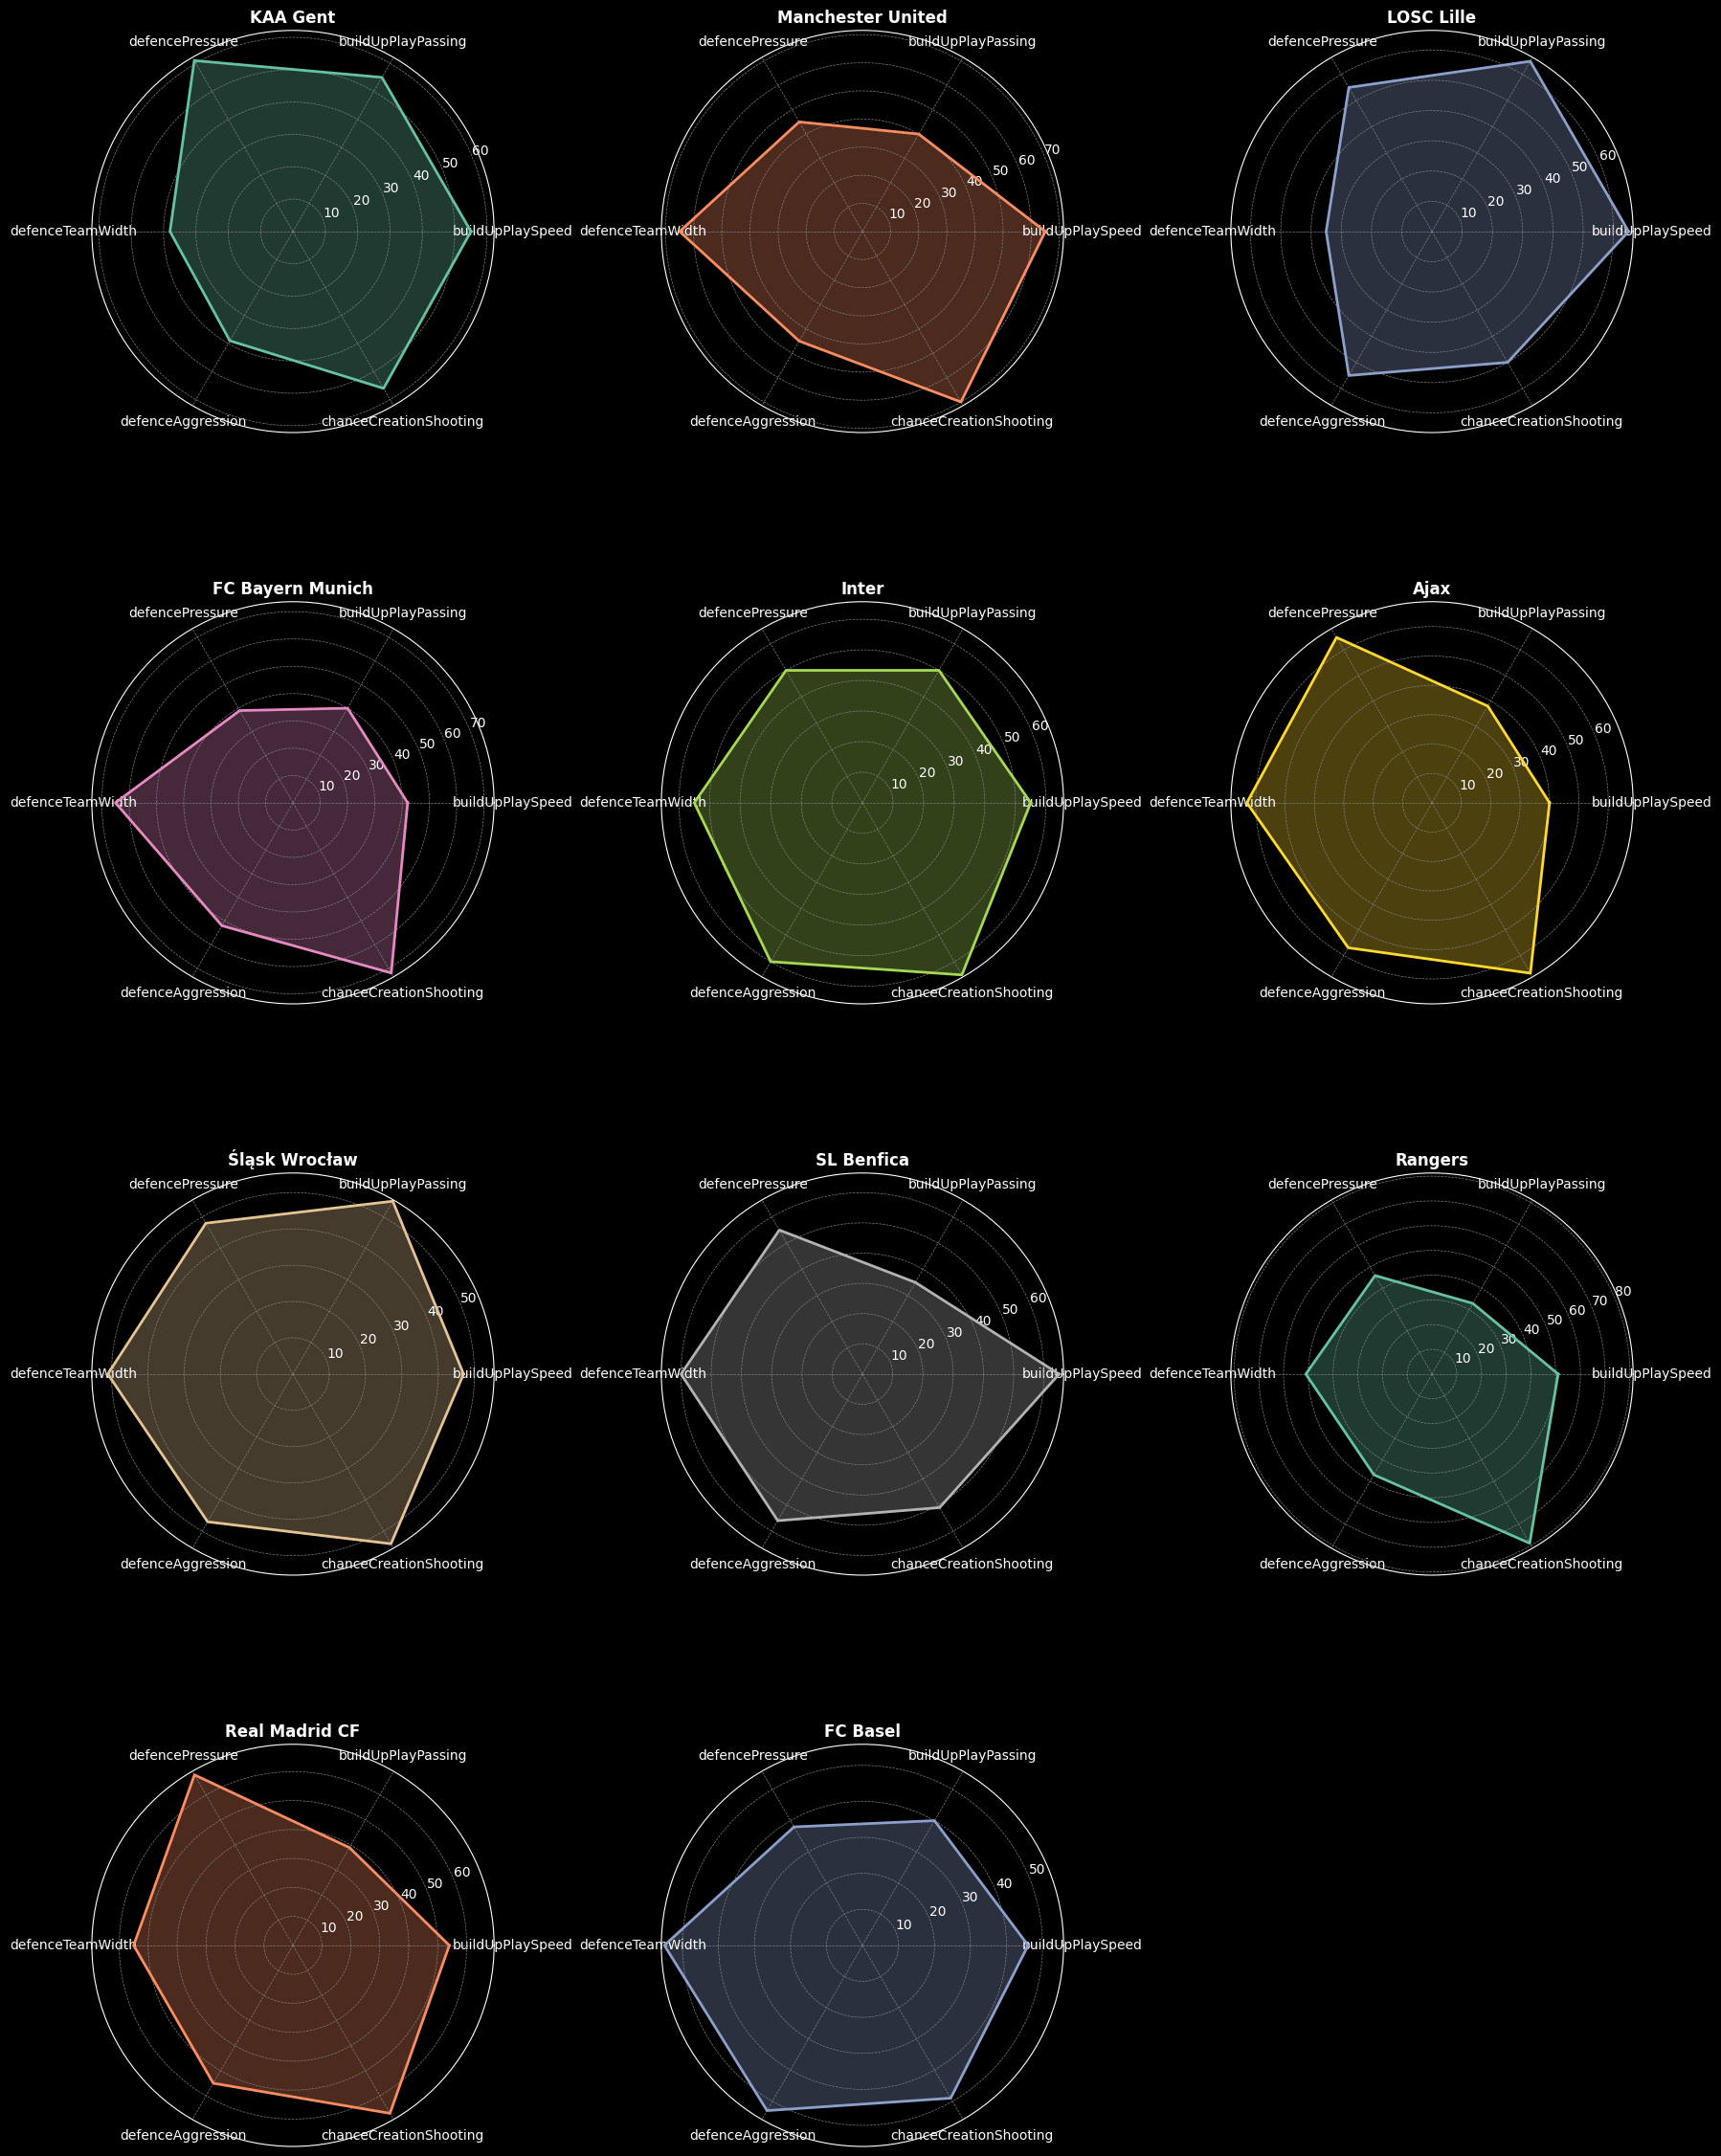

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne 'date' est en format datetime
team_attribute['date'] = pd.to_datetime(team_attribute['date'])

# Extraction de l'année
team_attribute['year'] = team_attribute['date'].dt.year

# Exemple de filtrage pour l'année sélectionnée
selected_year = 2011

# Filtrer les données des équipes et des attributs pour l'année sélectionnée
filtered_teams = team[team['year'] == selected_year]
filtered_attributes = team_attribute[team_attribute['year'] == selected_year]

# Associer les données d'attributs aux équipes
data = pd.merge(filtered_teams, filtered_attributes, on="team_api_id", how="inner")

# Trouver la meilleure équipe par ligue en fonction du nombre de victoires
best_teams_per_league = data.loc[data.groupby('league_id_y')['wins'].idxmax()]

# Colonnes des catégories à visualiser
categories = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'defencePressure', 
              'defenceTeamWidth', 'defenceAggression', 'chanceCreationShooting']

# Fermer le cercle pour chaque équipe
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

# Nombre d'équipes à afficher
num_teams = len(best_teams_per_league)

# Créer la figure avec un nombre de lignes et colonnes ajusté (3 graphiques par ligne)
num_cols = 3  # Nombre de graphiques par ligne
num_rows = (num_teams // num_cols) + (1 if num_teams % num_cols != 0 else 0)  # Calculer le nombre de lignes nécessaires

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), subplot_kw=dict(polar=True), facecolor="black")

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Créer une palette de couleurs distinctes pour chaque équipe
colors = sns.color_palette("Set2", num_teams)

# Tracer les données pour chaque équipe dans un graphique radar distinct
# Modifier les éléments spécifiques des radars pour un thème sombre
for idx, (ax, (team_idx, team_)) in enumerate(zip(axes, best_teams_per_league.iterrows())):
    ax.set_facecolor("black")  # Fond noir pour le radar
    team_data = team_[categories].values.flatten().tolist()
    team_data += team_data[:1]  # Fermer le cercle

    # Tracer le graphique radar pour chaque équipe avec une couleur différente
    ax.plot(angles, team_data, label=team_['team_long_name_y'], linewidth=2, color=colors[idx])
    ax.fill(angles, team_data, alpha=0.3, color=colors[idx])

    # Ajouter les étiquettes de catégories
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, color="white")

    # Ajouter un titre pour chaque graphique
    ax.set_title(f'{team_["team_long_name_y"]}', size=12, weight='bold', color="white")

    # Modifier la couleur des grilles et des axes
    ax.spines['polar'].set_color("white")
    ax.tick_params(colors="white")
    ax.grid(color="gray", linestyle="--", linewidth=0.5)

# Ajuster l'affichage et les espacements
# Masquer les axes non utilisés si les équipes sont inférieures au nombre total de sous-graphes
for i in range(num_teams, len(axes)):
    axes[i].axis('off')

# Ajouter une légende globale
plt.tight_layout()
plt.show()


In [21]:
#Quels sont les matchs avec les scores les plus élevés
pd.set_option('display.max_columns', None)

match_ = match_[['country_id','season','league_id','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','possession']]
match_['total_goal'] = match_['home_team_goal']+match_['away_team_goal']
data_match_plus_goals = match_[['home_team_api_id','away_team_api_id','total_goal','home_team_goal','away_team_goal']]

In [22]:
# Jointure pour les équipes à domicile
merged_home = pd.merge(data_match_plus_goals, table_name_team, 
                       left_on='home_team_api_id', 
                       right_on='team_api_id', 
                       how='left')

# Renommer les colonnes pour éviter les conflits après la deuxième jointure
merged_home.rename(columns={'team_long_name': 'home_team_name', 'team_short_name': 'home_team_short_name'}, inplace=True)

# Jointure pour les équipes à l'extérieur
final_merge = pd.merge(merged_home, table_name_team, 
                       left_on='away_team_api_id', 
                       right_on='team_api_id', 
                       how='left')

final_merge.rename(columns={'team_long_name': 'away_team_name', 'team_short_name': 'away_team_short_name'}, inplace=True)

final_merge.drop(columns=['team_api_id_x', 'team_api_id_y'], inplace=True)




In [23]:
final_merge['winner'] = np.where(
    final_merge['home_team_goal'] > final_merge['away_team_goal'], 'home',  # Équipe à domicile gagne
    np.where(
        final_merge['home_team_goal'] < final_merge['away_team_goal'], 'away',  # Équipe à l'extérieur gagne
        'draw'  # Égalité
    )
)
final_merge['winner_team'] = np.where(
    final_merge['winner'] == 'home', final_merge['home_team_name'],
    np.where(final_merge['winner'] == 'away', final_merge['away_team_name'], 'draw')
)

final_merge.head()

,home_team_api_id,away_team_api_id,total_goal,home_team_goal,away_team_goal,home_team_name,home_team_short_name,away_team_name,away_team_short_name,winner,winner_team
0,9987,9993,2,1,1,KRC Genk,GEN,Beerschot AC,BAC,draw,draw
1,10000,9994,0,0,0,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,draw,draw
2,9984,8635,3,0,3,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,away,RSC Anderlecht
3,9991,9998,5,5,0,KAA Gent,GEN,RAEC Mons,MON,home,KAA Gent
4,7947,9985,4,1,3,FCV Dender EH,DEN,Standard de Liège,STL,away,Standard de Liège


In [24]:
final_merge.to_csv('final_merge_equipe.csv',index=False)

In [25]:
goal_away = final_merge.groupby('home_team_api_id').agg({
    'home_team_goal':'sum',


}).reset_index()
goal_home = final_merge.groupby('away_team_api_id').agg({
    'away_team_goal':'sum'

}).reset_index()


In [26]:
goal_home

,away_team_api_id,away_team_goal
0,1601,132
1,1773,52
2,1957,111
3,2033,68
4,2182,157
...,...,...
294,158085,45
295,177361,12
296,188163,19
297,208931,14


In [27]:
goal_away

,home_team_api_id,home_team_goal
0,1601,148
1,1773,74
2,1957,176
3,2033,70
4,2182,215
...,...,...
294,158085,56
295,177361,21
296,188163,15
297,208931,23


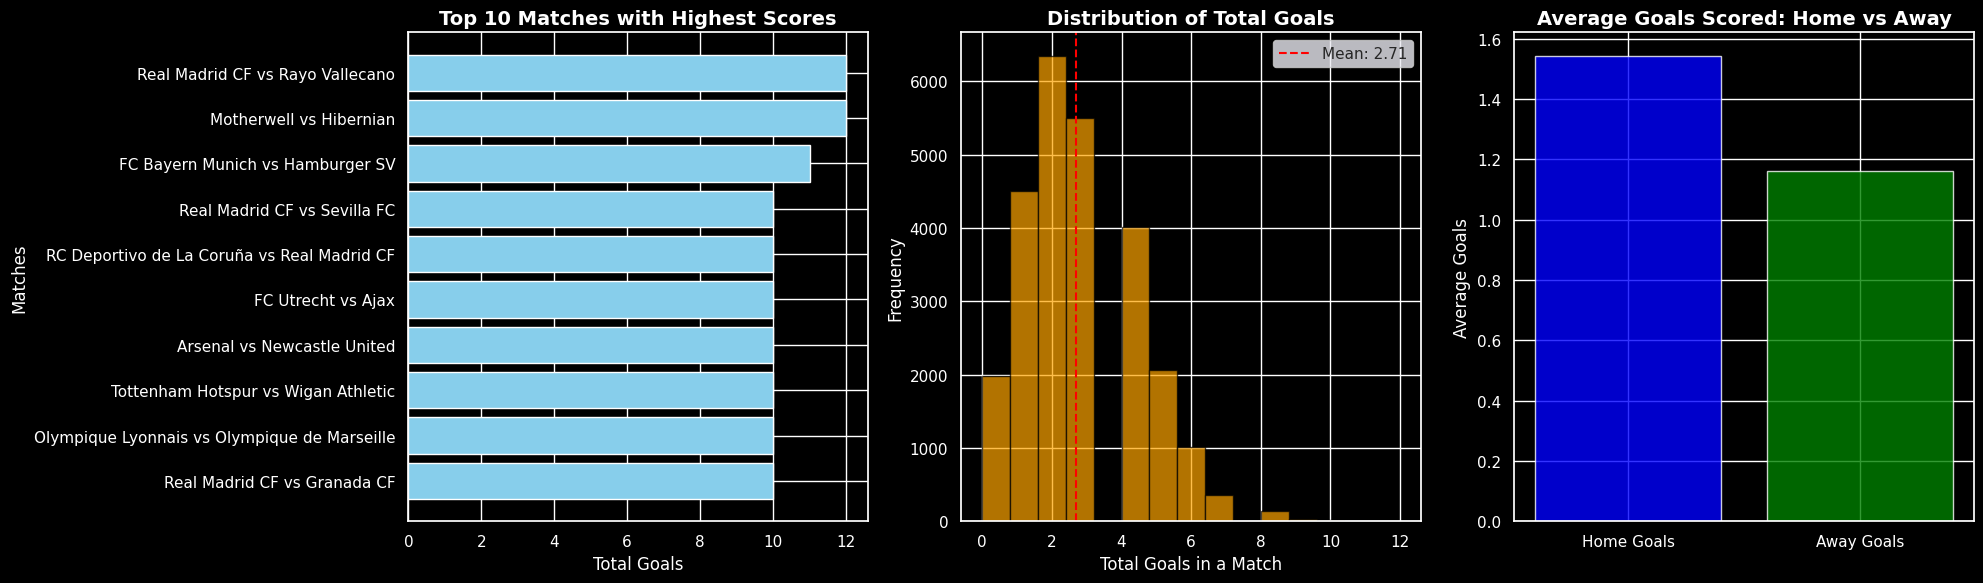

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration des styles pour un fond sombre
sns.set(style="darkgrid")  # Utiliser un fond sombre avec une grille claire

# Créer une figure avec 3 sous-graphiques (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), facecolor='black')  # Fond sombre pour la figure

# Modifier le fond des axes pour les rendre sombres
for ax in axes:
    ax.set_facecolor('black')  # Fond sombre pour chaque sous-graphe
    ax.tick_params(axis='x', colors='white')  # Couleur des ticks sur l'axe X
    ax.tick_params(axis='y', colors='white')  # Couleur des ticks sur l'axe Y
    ax.spines['top'].set_color('white')  # Couleur des bords
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

### 1. Quels sont les matchs avec les scores les plus élevés ? ###
# Trier les matchs par total_goal décroissant
top_matches = final_merge.sort_values(by='total_goal', ascending=False).head(10)

# Graphique des scores les plus élevés
axes[0].barh(top_matches['home_team_name'] + " vs " + top_matches['away_team_name'], 
             top_matches['total_goal'], color='skyblue')
axes[0].set_xlabel('Total Goals', fontsize=12, color='white')
axes[0].set_ylabel('Matches', fontsize=12, color='white')
axes[0].set_title('Top 10 Matches with Highest Scores', fontsize=14, weight='bold', color='white')
axes[0].invert_yaxis()  # Inverser l'axe pour avoir le plus haut score en haut

### 2. Analysez les matchs marqués par un grand nombre de buts ###
# Distribution des buts
axes[1].hist(final_merge['total_goal'], bins=15, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(final_merge['total_goal'].mean(), color='red', linestyle='--', 
                label=f'Mean: {final_merge["total_goal"].mean():.2f}')
axes[1].set_xlabel('Total Goals in a Match', fontsize=12, color='white')
axes[1].set_ylabel('Frequency', fontsize=12, color='white')
axes[1].set_title('Distribution of Total Goals', fontsize=14, weight='bold', color='white')
axes[1].legend()

### 3. Différences de performances entre matchs à domicile et à l'extérieur ###
# Moyenne des buts marqués à domicile et à l'extérieur
avg_home_goals = final_merge['home_team_goal'].mean()
avg_away_goals = final_merge['away_team_goal'].mean()

# Bar plot
axes[2].bar(['Home Goals', 'Away Goals'], [avg_home_goals, avg_away_goals], 
            color=['blue', 'green'], alpha=0.8)
axes[2].set_ylabel('Average Goals', fontsize=12, color='white')
axes[2].set_title('Average Goals Scored: Home vs Away', fontsize=14, weight='bold', color='white')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


## clustring 

In [29]:
attribut_player = pd.read_sql('select * from Player_Attributes',conn)

In [30]:
attribut_player

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [31]:
player = player[['player_api_id','player_name','assist','goals']]

In [32]:
player

,player_api_id,player_name,assist,goals
0,505942,Aaron Appindangoye,0,0
1,155782,Aaron Cresswell,4,2
2,155782,Aaron Cresswell,4,2
3,162549,Aaron Doran,0,0
4,30572,Aaron Galindo,0,0
...,...,...,...,...
14682,36491,Zsolt Low,0,0
14683,35506,Zurab Khizanishvili,0,0
14684,39902,Zvjezdan Misimovic,4,6
14685,39902,Zvjezdan Misimovic,6,10


In [33]:
attribut_player

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [34]:
def changer_defensiveor_attacking_work(x):
    if str(x) not in ['medium','high','low']:
        return 'medium'
    else:
        return x

In [35]:
attribut_player['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [36]:
attribut_player['defensive_work_rate'] = attribut_player['defensive_work_rate'].apply(changer_defensiveor_attacking_work)
attribut_player['attacking_work_rate'] = attribut_player['defensive_work_rate'].apply(changer_defensiveor_attacking_work)

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoder la colonne 'category'
attribut_player['defensive_work_rate_encoding'] = label_encoder.fit_transform(attribut_player['defensive_work_rate'])
attribut_player['attacking_work_rate_encoding'] = label_encoder.fit_transform(attribut_player['attacking_work_rate'])


In [38]:
attribut_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            183978 non-null  int64  
 1   player_fifa_api_id            183978 non-null  int64  
 2   player_api_id                 183978 non-null  int64  
 3   date                          183978 non-null  object 
 4   overall_rating                183142 non-null  float64
 5   potential                     183142 non-null  float64
 6   preferred_foot                183142 non-null  object 
 7   attacking_work_rate           183978 non-null  object 
 8   defensive_work_rate           183978 non-null  object 
 9   crossing                      183142 non-null  float64
 10  finishing                     183142 non-null  float64
 11  heading_accuracy              183142 non-null  float64
 12  short_passing                 183142 non-nul

In [39]:
attribut_player = attribut_player.dropna()

In [40]:
attribut_player

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,defensive_work_rate_encoding,attacking_work_rate_encoding
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2,2
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2,2
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2,2
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2,2
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,low,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1,1
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,low,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,1
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,low,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,1
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,low,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1,1


In [41]:
table_player_final_grouped = attribut_player.groupby(['player_api_id']).agg({                
    'overall_rating': 'mean',       
    'potential': 'mean',            
    'crossing': 'mean',            
    'finishing': 'mean',            
    'heading_accuracy': 'mean',     
    'short_passing': 'mean',            
    'dribbling': 'mean',                           
    'free_kick_accuracy': 'mean',   
    'long_passing': 'mean',         
    'ball_control': 'mean',         
    'acceleration': 'mean',         
    'sprint_speed': 'mean',         
    'reactions': 'mean',            
    'shot_power': 'mean',           
    'jumping': 'mean',              
    'strength': 'mean',            
    'long_shots': 'mean',           
    'aggression': 'mean',           
    'interceptions': 'mean',        
    'positioning': 'mean',          
    'vision': 'mean',               
    'penalties': 'mean',            
    'marking': 'mean',              
    'standing_tackle': 'mean',      
    'sliding_tackle': 'mean',       
    'gk_diving': 'mean',            
    'gk_handling': 'mean',          
    'gk_kicking': 'mean',           
    'gk_positioning': 'mean',       
    'gk_reflexes': 'mean' ,
    'defensive_work_rate_encoding':'mean',
    'attacking_work_rate_encoding':'mean'    # Moyenne des performances
}).reset_index()

# Afficher le résultat


In [42]:
table_player_final_grouped=table_player_final_grouped.merge(player[['player_api_id','player_name','assist','goals']].groupby('player_api_id').agg({
    'assist':'sum',
    'goals':'sum'
}).reset_index(),on='player_api_id',how='left')

In [43]:
table_player_final_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   player_api_id                 10582 non-null  int64  
 1   overall_rating                10582 non-null  float64
 2   potential                     10582 non-null  float64
 3   crossing                      10582 non-null  float64
 4   finishing                     10582 non-null  float64
 5   heading_accuracy              10582 non-null  float64
 6   short_passing                 10582 non-null  float64
 7   dribbling                     10582 non-null  float64
 8   free_kick_accuracy            10582 non-null  float64
 9   long_passing                  10582 non-null  float64
 10  ball_control                  10582 non-null  float64
 11  acceleration                  10582 non-null  float64
 12  sprint_speed                  10582 non-null  float64
 13  r

In [44]:
table_player_final_grouped = table_player_final_grouped.drop_duplicates(subset=['player_api_id'])


In [45]:
table_player_final_grouped

,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,reactions,shot_power,jumping,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,defensive_work_rate_encoding,attacking_work_rate_encoding,assist,goals
0,2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,54.142857,49.928571,65.571429,59.142857,66.857143,63.285714,49.714286,66.714286,58.714286,55.785714,56.857143,71.285714,62.071429,50.357143,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571,2.0,2.0,0,0
1,2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,44.857143,18.857143,59.571429,55.571429,41.619048,42.190476,60.857143,57.428571,56.523810,82.238095,19.571429,80.285714,71.428571,31.428571,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238,2.0,2.0,0,0
2,2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,40.238095,20.047619,57.000000,56.380952,56.952381,58.904762,69.809524,38.761905,76.904762,67.428571,19.428571,62.761905,74.714286,44.190476,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238,2.0,2.0,1,0
3,2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,75.066667,68.666667,70.266667,76.733333,62.200000,59.800000,65.933333,68.333333,57.133333,62.600000,73.000000,56.800000,44.933333,64.533333,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000,1.0,1.0,0,0
4,2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,60.800000,55.400000,69.800000,66.800000,70.800000,71.200000,69.200000,46.400000,61.000000,71.000000,42.400000,68.400000,63.400000,60.600000,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000,2.0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,744907,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,56.454545,43.454545,58.454545,55.454545,66.000000,64.000000,53.454545,50.454545,63.000000,49.909091,38.454545,36.454545,22.454545,48.454545,51.454545,52.454545,39.454545,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545,2.0,2.0,0,0
10578,746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,67.000000,39.000000,35.000000,55.000000,77.000000,76.000000,60.000000,29.000000,55.000000,46.000000,27.000000,59.000000,53.000000,55.000000,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000,2.0,2.0,0,0
10579,748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,41.000000,20.000000,41.000000,42.000000,64.000000,68.000000,48.000000,46.000000,68.000000,67.000000,25.000000,52.000000,55.000000,38.000000,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000,2.0,2.0,0,0
10580,750435,56.444444,70.444444,35.000000,57.000000,55.000000,60.000000,58.555556,37.000000,54.000000,56.333333,65.666667,63.555556,61.000000,57.000000,58.000000,46.000000,50.000000,34.000000,13.000000,56.333333,58.000000,61.000000,18.000000,19.000000,21.000000,9.000000,10.000000,8.000000,10.000000,11.000000,1.0,1.0,0,0


In [46]:
zebi = table_player_final_grouped[['gk_reflexes', 'gk_diving', 'standing_tackle', 'interceptions',
                       'finishing', 'positioning','attacking_work_rate_encoding','defensive_work_rate_encoding','assist','goals']]

In [47]:
data = {
    'gk_reflexes': [10.42, 15.10, 12.10, 17.0],
    'gk_diving': [12.42, 11.10, 10.76, 8.67],
    'standing_tackle': [63.85, 70.67, 70.62, 37.53],
    'interceptions': [62.07, 71.43, 74.71, 44.93],
    'finishing': [47.28, 37.43, 42.76, 67.67],
    'positioning': [50.36, 31.43, 44.19, 64.53],
    'attacking_work_rate_encoding': [2.0, 2.0, 2.0, 1.0],
    'defensive_work_rate_encoding': [2.0, 2.0, 2.0, 2.0],
    'assist': [0, 0, 1, 0],
    'goals': [0, 0, 0, 0]
}

df = pd.DataFrame(data)

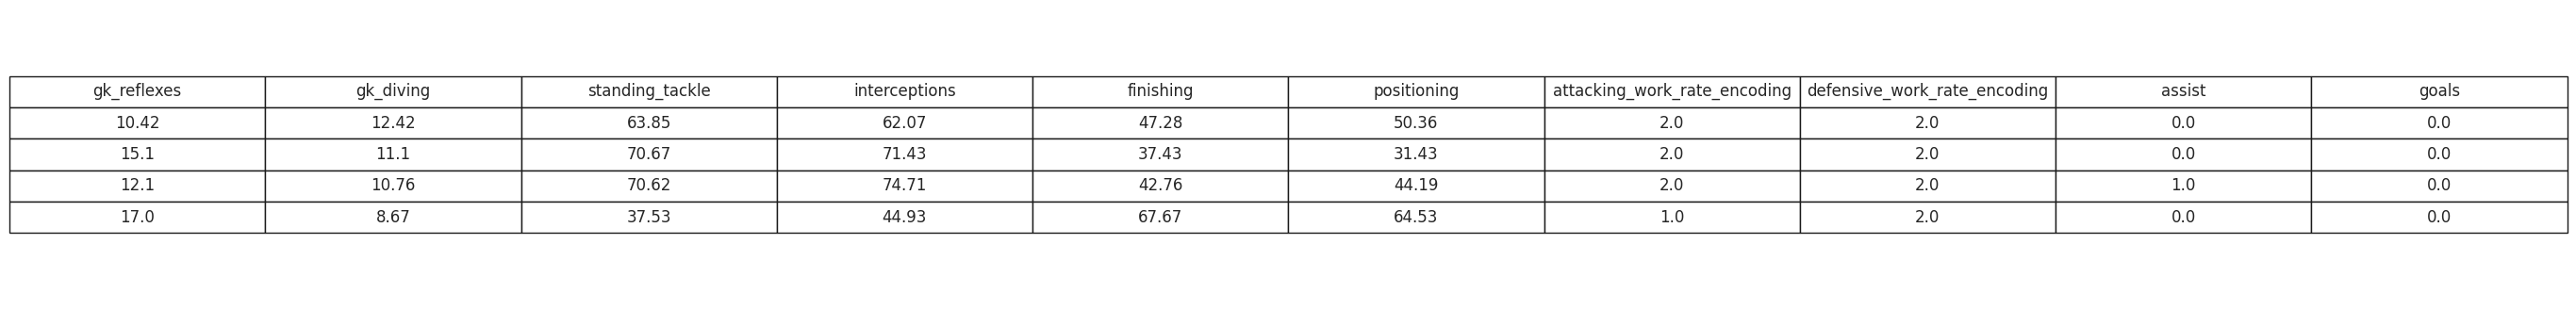

In [48]:

# Créer une figure et ajuster la taille
fig, ax = plt.subplots(figsize=(10, 4))  # Augmenter la taille de la figure pour plus de lisibilité
ax.axis('tight')
ax.axis('off')

# Ajouter une table dans la figure
table = ax.table(
    cellText=df.head().values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center',
)

# Ajuster les polices et dimensions
table.auto_set_font_size(False)
table.set_fontsize(12)  # Ajuster la taille de la police
table.scale(3.5, 2)  # Ajuster l'échelle du tableau

# Sauvegarder la table en tant qu'image
plt.savefig("df_head_image.png", dpi=600, bbox_inches='tight')
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'une version fictive du dataframe basée sur les colonnes visibles
data = {
    'gk_reflexes': [10.42, 15.10, 12.10, 17.0],
    'gk_diving': [12.42, 11.10, 10.76, 8.67],
    'standing_tackle': [63.85, 70.67, 70.62, 37.53],
    'interceptions': [62.07, 71.43, 74.71, 44.93],
    'finishing': [47.28, 37.43, 42.76, 67.67],
    'positioning': [50.36, 31.43, 44.19, 64.53],
    'attacking_work_rate_encoding': [2.0, 2.0, 2.0, 1.0],
    'defensive_work_rate_encoding': [2.0, 2.0, 2.0, 2.0],
    'assist': [0, 0, 1, 0],
    'goals': [0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Style de Seaborn pour améliorer l'esthétique
sns.set(style="whitegrid", font_scale=1.2, palette="deep")

# Création de la figure
plt.figure(figsize=(12, 6))
plt.axis('off')  # Supprimer les axes

# Création d'une table stylisée
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=sns.color_palette("Blues", n_colors=df.shape[1]))

table.auto_set_font_size(False)
table.set_fontsize(10)

# Sauvegarder l'image
output_path = 'df_head_colored.png'
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()

output_path

'df_head_colored.png'

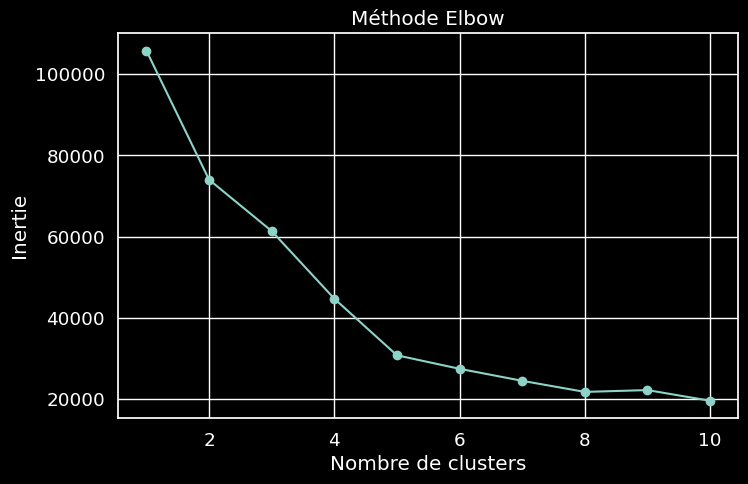

In [50]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


attributes = ['gk_reflexes', 'gk_diving', 'standing_tackle', 'interceptions',
                       'finishing', 'positioning','attacking_work_rate_encoding','defensive_work_rate_encoding','assist','goals']
data_selected = table_player_final_grouped.set_index('player_api_id')[attributes]

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# === K-Means Clustering ===
# Déterminer le nombre optimal de clusters (méthode Elbow)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.style.use('dark_background')

# Tracer la courbe d'Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Silhouette Score: 0.4020464116683313


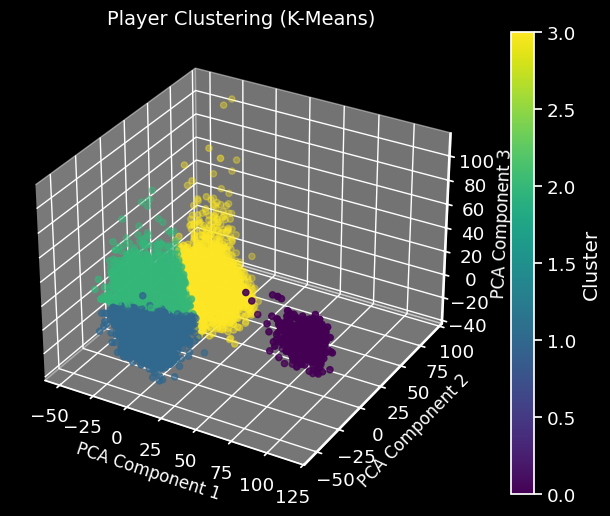

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_selected['cluster_kmeans'] = kmeans.fit_predict(data_selected)

# Réduction de la dimensionnalité avec PCA (3 composants)
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data_selected.drop('cluster_kmeans', axis=1))  # Assurez-vous de ne pas inclure la colonne 'cluster_kmeans' dans le PCA

# Visualisation en 3D avec un fond sombre
fig = plt.figure(figsize=(10, 6), facecolor='black')  # Fond sombre pour la figure
ax = fig.add_subplot(111, projection='3d')

# Modifier le fond des axes pour un fond sombre
ax.set_facecolor('black')  # Fond sombre pour les axes
ax.tick_params(axis='x', colors='white')  # Couleur des ticks sur l'axe X
ax.tick_params(axis='y', colors='white')  # Couleur des ticks sur l'axe Y
ax.tick_params(axis='z', colors='white')  # Couleur des ticks sur l'axe Z
ax.spines['top'].set_color('white')  # Couleur des bords des axes
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Affichage des points avec les couleurs représentant les clusters
sc = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                c=data_selected['cluster_kmeans'], cmap='viridis')

# Ajouter un titre et des étiquettes d'axes avec un texte blanc
ax.set_title('Player Clustering (K-Means)', fontsize=14, color='white')
ax.set_xlabel('PCA Component 1', fontsize=12, color='white')
ax.set_ylabel('PCA Component 2', fontsize=12, color='white')
ax.set_zlabel('PCA Component 3', fontsize=12, color='white')

# Ajouter une barre de couleur pour les clusters
plt.colorbar(sc, label='Cluster')

# Calcul du Silhouette Score
sil_score = silhouette_score(data_selected.drop('cluster_kmeans', axis=1), data_selected['cluster_kmeans'])
print(f'Silhouette Score: {sil_score}')

plt.show()


In [52]:
data_selected =data_selected.reset_index()

In [53]:
data_selected = data_selected.merge(player[['player_api_id','player_name']],on='player_api_id',how='left')
data_selected = data_selected.drop_duplicates(subset='player_api_id')
data_selected

,player_api_id,gk_reflexes,gk_diving,standing_tackle,interceptions,finishing,positioning,attacking_work_rate_encoding,defensive_work_rate_encoding,assist,goals,cluster_kmeans,player_name
0,2625,10.428571,12.428571,63.857143,62.071429,47.285714,50.357143,2.0,2.0,0,0,2,"Patryk Rachwal,18"
1,2752,15.095238,11.095238,70.666667,71.428571,37.428571,31.428571,2.0,2.0,0,0,1,Diego Mainz
2,2768,12.095238,10.761905,70.619048,74.714286,42.761905,44.190476,2.0,2.0,1,0,1,Jose Dorado
3,2770,17.000000,8.666667,37.533333,44.933333,67.666667,64.533333,1.0,1.0,0,0,3,Ignacio Gonzalez
4,2790,17.400000,8.000000,74.600000,63.400000,37.400000,60.600000,2.0,2.0,2,0,2,Alberto Rey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,744907,8.454545,8.454545,48.454545,22.454545,44.454545,48.454545,2.0,2.0,0,0,3,Greg Taylor
14202,746419,9.000000,7.000000,69.000000,53.000000,28.000000,55.000000,2.0,2.0,0,0,1,Francisco Afonso
14203,748432,6.000000,8.000000,69.000000,55.000000,26.000000,38.000000,2.0,2.0,0,0,1,Fynn Arkenberg
14204,750435,11.000000,9.000000,19.000000,13.000000,57.000000,56.333333,1.0,1.0,0,0,3,Rees Greenwood


In [54]:
cluster_player_0 = data_selected[data_selected['cluster_kmeans']==0]
cluster_player_1 = data_selected[data_selected['cluster_kmeans']==1]
cluster_player_2 = data_selected[data_selected['cluster_kmeans']==2]
cluster_player_3 = data_selected[data_selected['cluster_kmeans']==3]



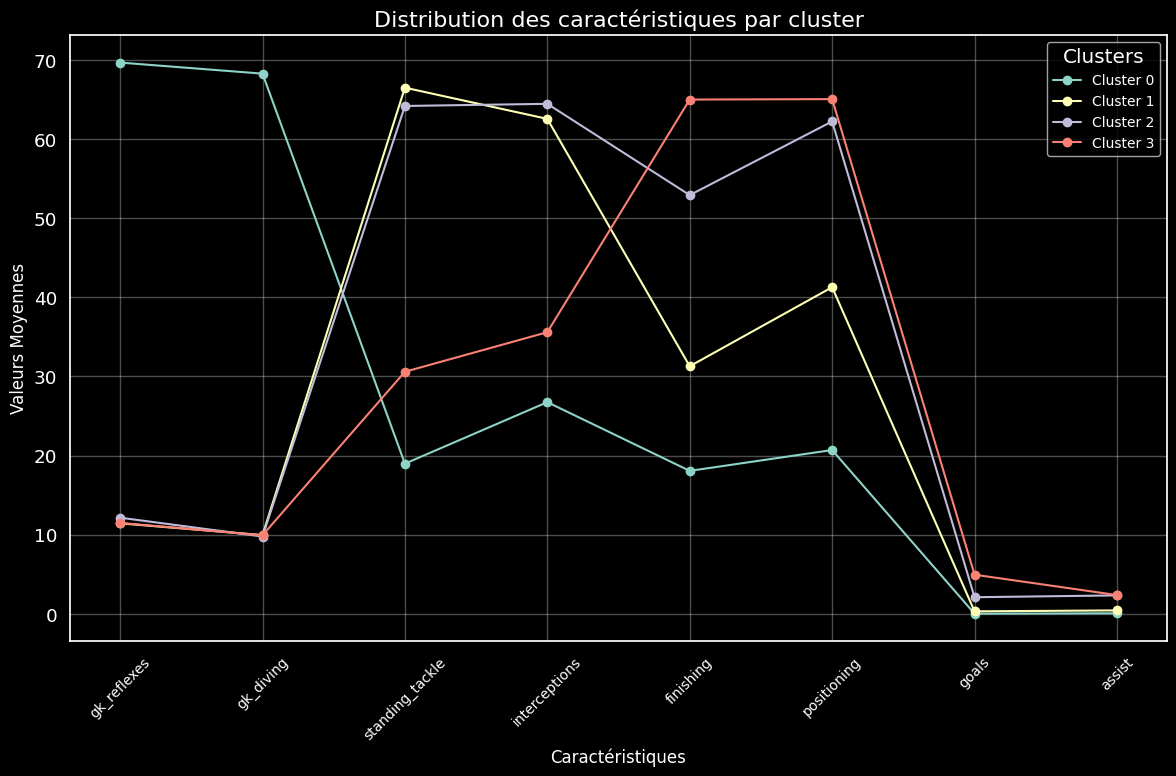

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une liste des clusters et des colonnes à tracer
clusters = [
    data_selected[data_selected['cluster_kmeans'] == i] for i in range(4)
]
features = ['gk_reflexes', 'gk_diving', 'standing_tackle', 'interceptions', 'finishing', 'positioning','goals','assist']

# Calculer les moyennes pour chaque caractéristique par cluster
cluster_means = {f"Cluster {i}": cluster[features].mean() for i, cluster in enumerate(clusters)}

# Créer un DataFrame pour faciliter la visualisation
mean_df = pd.DataFrame(cluster_means).T
mean_df.columns = features

# Visualisation
plt.figure(figsize=(12, 8))
for cluster_label, row in mean_df.iterrows():
    plt.plot(features, row, marker='o', label=cluster_label)
plt.style.use('dark_background')

# Ajouter des détails au graphique
plt.title("Distribution des caractéristiques par cluster", fontsize=16)
plt.xlabel("Caractéristiques", fontsize=12)
plt.ylabel("Valeurs Moyennes", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Clusters", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 1 == defeneseur 
## 3 == attackant 
## 0 == goealkepper
## 2 == midfielder

In [56]:
data_selected[data_selected['cluster_kmeans'] == 1].head(100)

,player_api_id,gk_reflexes,gk_diving,standing_tackle,interceptions,finishing,positioning,attacking_work_rate_encoding,defensive_work_rate_encoding,assist,goals,cluster_kmeans,player_name
1,2752,15.095238,11.095238,70.666667,71.428571,37.428571,31.428571,2.000,2.000,0,0,1,Diego Mainz
2,2768,12.095238,10.761905,70.619048,74.714286,42.761905,44.190476,2.000,2.000,1,0,1,Jose Dorado
17,2907,11.600000,9.800000,37.000000,55.100000,29.800000,60.700000,2.000,2.000,0,0,1,Gregory Lacombe
19,2977,9.625000,7.000000,73.250000,63.250000,43.750000,50.750000,2.000,2.000,0,0,1,David Rivas Rodriguez
27,3329,15.800000,9.600000,63.600000,67.600000,32.600000,46.000000,2.000,2.000,0,0,1,Vincent Euvrard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,21161,15.076923,9.846154,65.461538,63.230769,40.923077,44.000000,2.000,2.000,0,0,1,Amoreirinha
469,21213,6.000000,12.000000,57.000000,53.000000,36.000000,49.000000,2.000,2.000,0,0,1,Daniel Dunst
480,21450,11.181818,9.818182,77.500000,74.909091,36.363636,57.590909,2.000,2.000,1,0,1,Marc Bertran
486,21751,16.000000,10.500000,67.750000,58.625000,20.375000,46.125000,1.875,1.875,0,0,1,Mohammed Rabiu


In [57]:
data_selected.shape

(10582, 13)

## clustring_team

In [58]:
team_attribute = pd.read_csv('/home/rajarabii/projects/Football Européen avec le machine learning/ML/table_team_attribute.csv')

In [59]:
team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [60]:
goal_away

,home_team_api_id,home_team_goal
0,1601,148
1,1773,74
2,1957,176
3,2033,70
4,2182,215
...,...,...
294,158085,56
295,177361,21
296,188163,15
297,208931,23


In [61]:
team_attribute = team_attribute.merge(goal_away,how='left',left_on='team_api_id',right_on='home_team_api_id')
team_attribute = team_attribute.merge(goal_home,how='left',left_on='team_api_id',right_on='away_team_api_id')

In [62]:
team_attribute['total_goal'] = team_attribute['away_team_goal']+team_attribute['home_team_goal']

In [63]:
team_attribute =  team_attribute[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth','team_api_id','away_team_goal','home_team_goal']]


In [64]:
team_attribute = team_attribute.groupby('team_api_id').mean().reset_index()
team_attribute['total_goal'] = team_attribute['away_team_goal'] + team_attribute['home_team_goal']

In [65]:
team_attribute_for_clustr = team_attribute.set_index('team_api_id')[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth','total_goal']]
team_attribute_for_clustr

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,total_goal
team_api_id,,,,,,,,,
1601,47.333333,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333,280.0
1773,52.000000,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000,126.0
1957,47.166667,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667,287.0
2033,49.000000,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000,138.0
2182,60.333333,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000,372.0
...,...,...,...,...,...,...,...,...,...
10281,52.833333,53.666667,50.333333,59.166667,50.333333,45.500000,51.166667,52.666667,170.0
108893,43.166667,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333,21.0
158085,67.000000,39.000000,55.000000,59.000000,46.000000,36.000000,38.000000,37.000000,101.0


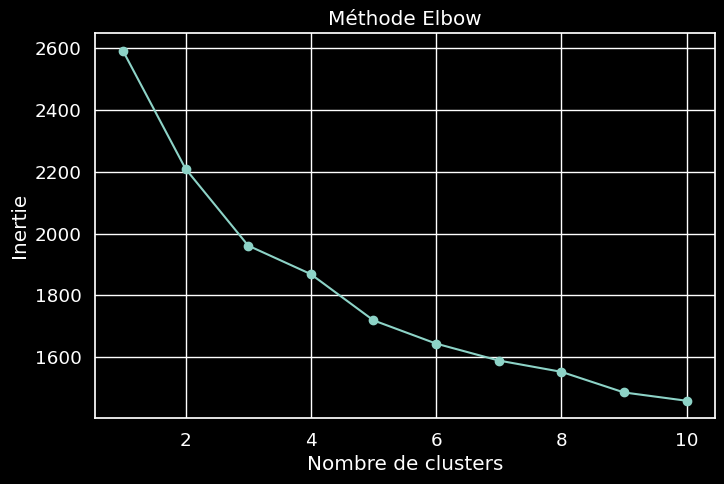

In [66]:
data_selected_team = team_attribute_for_clustr

# Normalisation des données
scaler = StandardScaler()
data_scaled_team = scaler.fit_transform(data_selected_team)

# === K-Means Clustering ===
# Déterminer le nombre optimal de clusters (méthode Elbow)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_team)
    inertia.append(kmeans.inertia_)

# Tracer la courbe d'Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


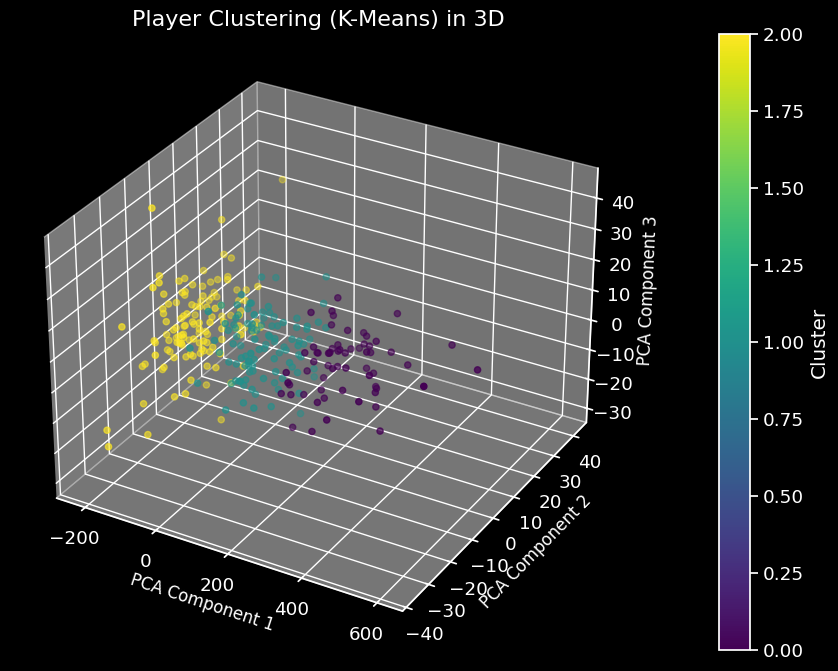

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Appliquer K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_selected_team['cluster_kmeans'] = kmeans.fit_predict(data_selected_team)

# Réduction de dimensions avec PCA à 3 dimensions
pca = PCA(n_components=3)
reduced_data_team_3d = pca.fit_transform(data_selected_team)

# Visualisation 3D avec un fond sombre
fig = plt.figure(figsize=(12, 8), facecolor='black')  # Fond sombre pour la figure
ax = fig.add_subplot(111, projection='3d')

# Modifier le fond des axes pour un fond sombre
ax.set_facecolor('black')  # Fond sombre pour les axes
ax.tick_params(axis='x', colors='white')  # Couleur des ticks sur l'axe X
ax.tick_params(axis='y', colors='white')  # Couleur des ticks sur l'axe Y
ax.tick_params(axis='z', colors='white')  # Couleur des ticks sur l'axe Z
ax.spines['top'].set_color('white')  # Couleur des bords des axes
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Scatter plot en 3D
scatter = ax.scatter(
    reduced_data_team_3d[:, 0],  # Première composante principale
    reduced_data_team_3d[:, 1],  # Deuxième composante principale
    reduced_data_team_3d[:, 2],  # Troisième composante principale
    c=data_selected_team['cluster_kmeans'],  # Clusters
    cmap='viridis'
)

# Titres et axes avec texte blanc
ax.set_title('Player Clustering (K-Means) in 3D', fontsize=16, color='white')
ax.set_xlabel('PCA Component 1', fontsize=12, color='white')
ax.set_ylabel('PCA Component 2', fontsize=12, color='white')
ax.set_zlabel('PCA Component 3', fontsize=12, color='white')

# Ajouter la barre de couleur
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')
colorbar.ax.yaxis.set_tick_params(labelcolor='white')  # Couleur des ticks de la barre de couleur
colorbar.ax.set_ylabel('Cluster', color='white')

plt.show()


In [68]:
zbi =data_selected_team[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']]

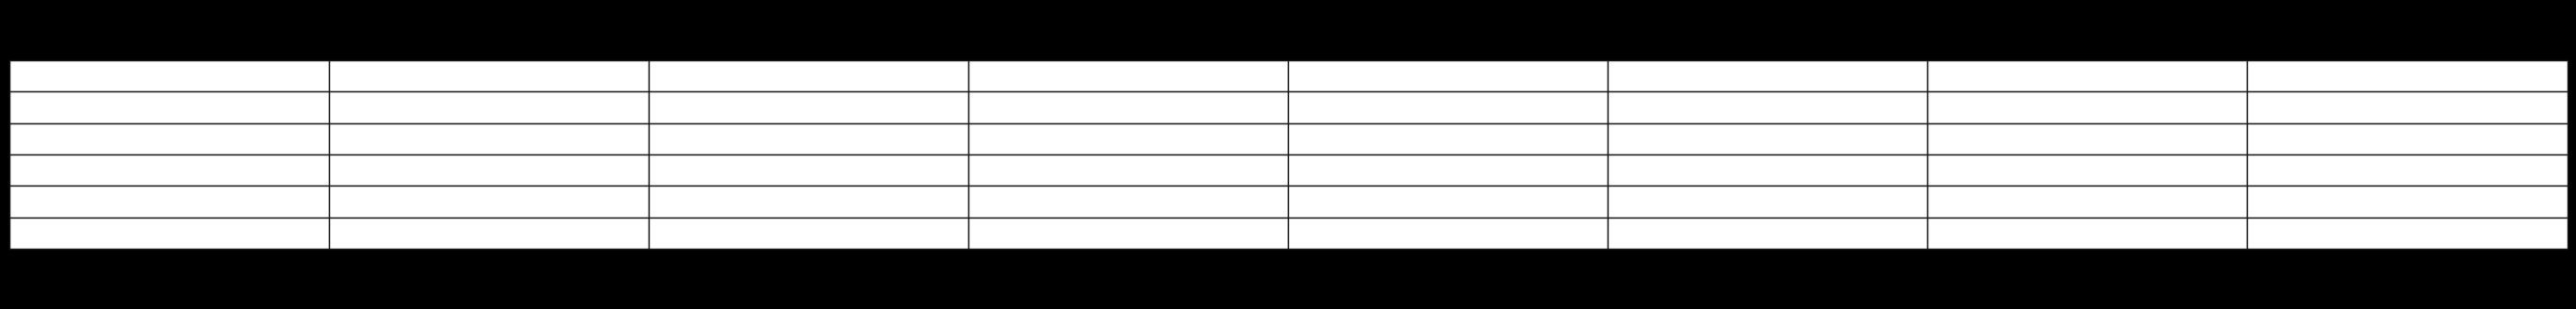

In [69]:

# Créer une figure et ajuster la taille
fig, ax = plt.subplots(figsize=(10, 4))  # Augmenter la taille de la figure pour plus de lisibilité
ax.axis('tight')
ax.axis('off')

# Ajouter une table dans la figure
table = ax.table(
    cellText=zbi.head().values,
    colLabels=zbi.columns,
    loc='center',
    cellLoc='center',
)

# Ajuster les polices et dimensions
table.auto_set_font_size(False)
table.set_fontsize(12)  # Ajuster la taille de la police
table.scale(3.5, 2)  # Ajuster l'échelle du tableau

# Sauvegarder la table en tant qu'image
plt.savefig("df_head_image.png", dpi=600, bbox_inches='tight')
plt.show()

In [70]:
data_selected_team = data_selected_team.reset_index()

In [71]:
les_equipes = pd.read_sql('select * from Team',conn)

In [72]:
data_selected_team=data_selected_team.merge(les_equipes[['team_api_id','team_long_name','team_short_name']],on='team_api_id',how='left')
data_selected_team

,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,total_goal,cluster_kmeans,team_long_name,team_short_name
0,1601,47.333333,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333,280.0,1,Ruch Chorzów,CHO
1,1773,52.000000,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000,126.0,2,Oud-Heverlee Leuven,O-H
2,1957,47.166667,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667,287.0,1,Jagiellonia Białystok,BIA
3,2033,49.000000,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000,138.0,2,S.C. Olhanense,OLH
4,2182,60.333333,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000,372.0,1,Lech Poznań,POZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,10281,52.833333,53.666667,50.333333,59.166667,50.333333,45.500000,51.166667,52.666667,170.0,2,Real Valladolid,VAL
284,108893,43.166667,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333,21.0,2,AC Arles-Avignon,ARL
285,158085,67.000000,39.000000,55.000000,59.000000,46.000000,36.000000,38.000000,37.000000,101.0,2,FC Arouca,ARO
286,208931,56.000000,48.000000,58.500000,38.000000,52.000000,35.500000,49.500000,43.000000,37.0,2,Carpi,CAP


In [73]:
cluster_team_0 = data_selected_team[data_selected_team['cluster_kmeans']==0]
cluster_team_1 = data_selected_team[data_selected_team['cluster_kmeans']==1]
cluster_team_2 = data_selected_team[data_selected_team['cluster_kmeans']==2]



<module 'matplotlib.pyplot' from '/home/rajarabii/projects/Football Européen avec le machine learning/my_envM/lib/python3.12/site-packages/matplotlib/pyplot.py'>

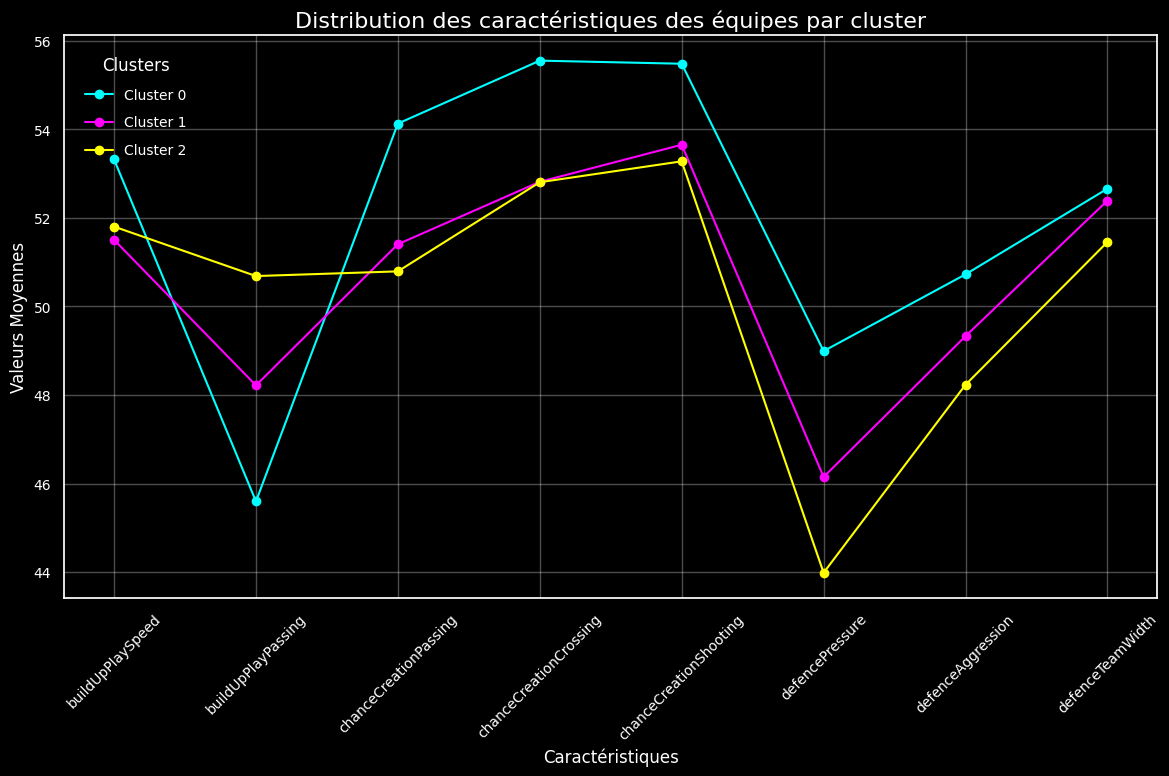

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer une liste des clusters et des colonnes à tracer
clusters = [
    data_selected_team[data_selected_team['cluster_kmeans'] == i] for i in range(3)
]
features = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 
    'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 
    'defenceAggression', 'defenceTeamWidth'
]

# Calculer les moyennes pour chaque caractéristique par cluster
cluster_means = {f"Cluster {i}": cluster[features].mean() for i, cluster in enumerate(clusters)}

# Créer un DataFrame pour faciliter la visualisation
mean_df = pd.DataFrame(cluster_means).T
mean_df.columns = features

# Palette de couleurs pour les clusters
colors = ['cyan', 'magenta', 'yellow']

# Visualisation avec un fond sombre
plt.figure(figsize=(12, 8), facecolor='black')  # Fond sombre pour la figure

# Modifier les axes pour un fond sombre
plt.gca().set_facecolor('black')  # Fond sombre pour les axes
plt.tick_params(axis='x', colors='white')  # Couleur des ticks sur l'axe X
plt.tick_params(axis='y', colors='white')  # Couleur des ticks sur l'axe Y
plt.xticks(rotation=45, fontsize=10, color='white')  # Couleur des étiquettes X
plt.yticks(fontsize=10, color='white')  # Couleur des étiquettes Y

# Tracer les courbes pour chaque cluster avec des couleurs uniques
for (cluster_label, row), color in zip(mean_df.iterrows(), colors):
    plt.plot(features, row, marker='o', label=cluster_label, color=color)

# Ajouter des détails au graphique
plt.title("Distribution des caractéristiques des équipes par cluster", fontsize=16, color='white')
plt.xlabel("Caractéristiques", fontsize=12, color='white')
plt.ylabel("Valeurs Moyennes", fontsize=12, color='white')
plt.legend(title="Clusters", fontsize=10, title_fontsize='12', labelspacing=1, loc='upper left', frameon=False, borderpad=1)

plt.grid(alpha=0.3, color='white')  # Grille en couleur blanche
plt.tight_layout()
plt
